# Orbital analysis

This section process the preliminary vibration data in different load condition of three bearings on hydropower plant.

In [43]:
# import all necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
import time
from scipy.signal import butter, buttord, sosfiltfilt, sosfreqz

In [25]:
# load the vibration data : Highload operational condition on Larona Unit #1 on August 10th, 2023 at 1:00:00 a.m. ; clockwise ; top ; X:0° EU Y:+90° EU 

db_data = pd.read_excel("LGS1_VibrationOrbit_2023_HighLoad.xlsx", sheet_name="Orbit Comparison")
db_data

,Sample,UGB – RPM – 1X,UGB – Time – 1X,UGB – Rev – 1X,UGB – Disp – 1X – X,UGB – Disp – 1X – Y,LGB – RPM – 1X,LGB – Time – 1X,LGB – Rev – 1X,LGB – Disp – 1X – X,...,LGB – RPM – Overall,LGB – Time – Overall,LGB – Rev – Overall,LGB – Disp – Overall – X,LGB – Disp – Overall – Y,TGB – RPM – Overall,TGB – Time – Overall,TGB – Rev – Overall,TGB – Disp – Overall – X,TGB – Disp – Overall – Y
0,0,274.5659,0.00250,0.011440,-7.341956,-25.48643,274.3167,0.00250,0.011430,-7.188057,...,274.1014,-0.13350,-0.609876,1.041757,28.28763,274.1463,-0.0865,-0.395228,-15.322840,9.291816
1,1,274.5659,0.00500,0.022880,-10.374100,-24.60291,274.3167,0.00500,0.022860,-8.392049,...,274.1014,-0.13100,-0.598455,2.848087,26.83592,274.1463,-0.0840,-0.383805,-2.616026,17.474010
2,2,274.5659,0.00750,0.034321,-13.352680,-23.59231,274.3167,0.00750,0.034290,-9.552778,...,274.1014,-0.12850,-0.587034,5.100100,26.27471,274.1463,-0.0815,-0.372382,-0.766762,21.112670
3,3,274.5659,0.01000,0.045761,-16.262290,-22.45986,274.3167,0.01000,0.045719,-10.664260,...,274.1014,-0.12600,-0.575613,6.967424,25.41591,274.1463,-0.0790,-0.360959,-11.631520,17.250910
4,4,274.5659,0.01250,0.057201,-19.087900,-21.21142,274.3167,0.01250,0.057149,-11.720770,...,274.1014,-0.12350,-0.564192,7.106296,24.72880,274.1463,-0.0765,-0.349537,-18.399570,5.029140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,4091,274.5659,10.22978,46.813610,37.999530,-18.84239,274.3167,10.22978,46.770810,16.625120,...,274.1014,10.09381,46.113980,-10.511710,-22.35616,274.1463,10.1408,46.334040,0.448353,-19.335870
4092,4092,274.5659,10.23228,46.825050,36.439040,-20.27262,274.3167,10.23228,46.782230,16.001380,...,274.1014,10.09631,46.125400,-11.522820,-21.98145,274.1463,10.1433,46.345460,-10.804430,-24.139180
4093,4093,274.5659,10.23478,46.836490,34.690410,-21.59819,274.3167,10.23478,46.793660,15.295160,...,274.1014,10.09881,46.136830,-9.998035,-20.34287,274.1463,10.1458,46.356880,5.835530,-15.187240
4094,4094,274.5659,10.23728,46.847930,32.762700,-22.81225,274.3167,10.23728,46.805090,14.510110,...,274.1014,10.10131,46.148250,-11.083810,-19.06629,274.1463,10.1483,46.368310,11.594640,-2.427618


In [30]:
ugb_1x_rpm = db_data['UGB – RPM – 1X']
ugb_1x_freq = db_data['UGB – RPM – 1X'] / 60
ugb_1x_freq

0       4.576098
1       4.576098
2       4.576098
3       4.576098
4       4.576098
          ...   
4091    4.576098
4092    4.576098
4093    4.576098
4094    4.576098
4095    4.576098
Name: UGB – RPM – 1X, Length: 4096, dtype: float64

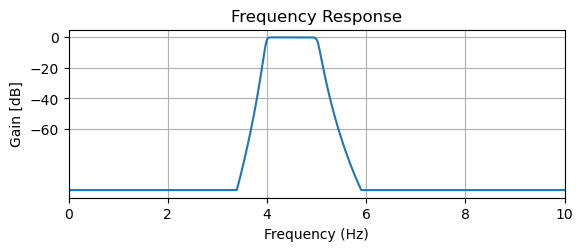

In [56]:
# filtering overall data into 1x, 2x, and 3x RPM data
fs = np.round(len(ugb_1x_time) / max(ugb_1x_time), 0)

dt = 1 / fs
fl = 4
fu = 5
transwidth = 0.2
f_band = np.array([fl, fu]) / (fs/2)
f_bands = [0, fl - transwidth, fl, fu, fu + transwidth, (fs/2)]
wp = [fl, fu]
ws = [fl - transwidth, fu + transwidth]

gpass = 1.5
gstop = 30
n, wn = buttord(wp, ws, gpass, gstop, fs=fs)
sos1 = butter(n, wn, 'bandpass', output='sos', fs=fs)

N = 16384
w,  h  = sosfreqz(sos1, worN=N, fs=fs)

plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w, db)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.xlim([0, 10])
plt.xlabel('Frequency (Hz)')

plt.show()

In [ ]:
# Filtering the raw data and compare with the provided preliminary data

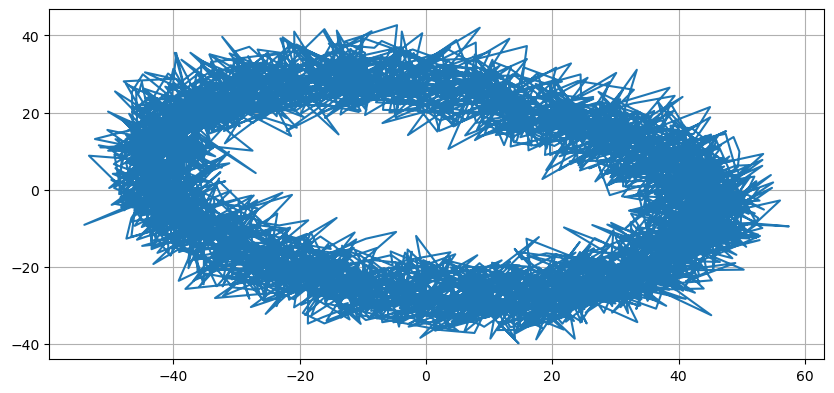

In [21]:
# extract and analyze the vibration data using orbital analysis

ugb_1x_time = db_data['UGB – Time – 1X']
ugb_1x_x = db_data['UGB – Disp – 1X – X']
ugb_1x_y = db_data['UGB – Disp – 1X – Y']

ugb_ovr_time = db_data['UGB – Time – Overall']
ugb_ovr_x = db_data['UGB – Disp – Overall – X']
ugb_ovr_y = db_data['UGB – Disp – Overall – Y']

ugb_1x_rpm =
ugb_ovr_rpm = 

# plot the orbit of data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(212)
ax.plot(ugb_ovr_x, ugb_ovr_y)
# ax.scatter(ugb_1x_x, ugb_1x_y)
plt.grid()
plt.show()    

# 